## <center>Examen mi-parcours </center>
<center>Master parcours SSD - UE Apprentissage statistique 2 </center>
<center>Automne 2021 </center>

In [1]:
# load package
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score

### Statistique descriptive

In [2]:
# load data
train_data_clinical = pd.read_csv("dataset/train-data_clinical.csv",sep=";")
train_data_clinical.shape
train_data_clinical.head()

,EXERCISE_FREQUENCY,SEX,ONE_LITER_OF_WATER_A_DAY_FREQUENCY,SEAFOOD_FREQUENCY,PROBIOTIC_FREQUENCY,OLIVE_OIL,FRUIT_FREQUENCY,SLEEP_DURATION,SUGAR_SWEETENED_DRINK_FREQUENCY,MILK_CHEESE_FREQUENCY,RED_MEAT_FREQUENCY,MEAT_EGGS_FREQUENCY,VEGETABLE_FREQUENCY
0,2,0,4,2,4,0,3,4,0,0,3,4,3
1,0,1,3,1,0,3,2,3,1,1,1,2,2
2,2,1,3,2,4,2,4,5,0,1,1,4,4
3,3,0,4,1,0,2,0,2,0,4,2,4,3
4,3,1,2,1,1,4,3,4,0,3,3,4,3


In [3]:
test_data_clinical = pd.read_csv("dataset/test-data_clinical.csv",sep=";",decimal=".")
test_data_clinical.shape

(850, 13)

In [5]:
train_data_otu = pd.read_csv("dataset/train-data_otu.csv",sep=";",low_memory=False,decimal=".") 
train_data_otu.shape
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: object(7033)
memory usage: 266.4+ MB


In [6]:
train_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,180439273676199","0,238664781994129",0,"0,00385995433293465",0,0,0,"0,000869848863759922","0,0167445906273785",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,000883197173769044","0,000504684099296597","0,000378513074472447","0,00170330883512601","0,000378513074472447",0,"0,0159921773964609","0,0166230325205817",0,0,...,0,0,0,0,0,0,0,0,0,0
2,"0,715733658673924","0,00225235793721552","0,0245413166909108","0,00183004082398761",0,"0,0156726573131247","0,00168926845291164","0,000797710102763831","0,00183004082398761",0,...,0,0,0,0,0,0,0,0,0,0
3,"0,00238338440585632","0,00374531835205993","0,00340483486550902","0,154125524912042","0,00612870275791624",0,"0,145386448757235",0,0,"0,0396095789354216",...,0,0,0,0,0,0,0,0,0,0
4,"0,000683565935630874",0,"0,105553973227001","0,0656223298205639","0,210823127314156","0,0504699515807462","0,0238678439191114","0,0694958701224722","0,00262033608658502",0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_data_otu =pd.read_csv("dataset/test-data_otu.csv",sep=";",low_memory=False)
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: int64(37), object(6996)
memory usage: 45.6+ MB


In [8]:
test_data_otu.head()

,OTU_1,OTU_2,OTU_3,OTU_4,OTU_5,OTU_6,OTU_7,OTU_8,OTU_9,OTU_10,...,OTU_7024,OTU_7025,OTU_7026,OTU_7027,OTU_7028,OTU_7029,OTU_7030,OTU_7031,OTU_7032,OTU_7033
0,"0,266402938683244",0,"0,00469059056230574","0,00514269567674484","0,132862390505793","0,000678157671658661","0,00299519638315908","0,0305170952246397","0,0394461712348121",0,...,0,0,0,0,0,0,0,0,0,0
1,"0,00141211445559272","0,228985507246377","0,00921590486807878","0,0130063173541434",0,0,"0,00594574507617986","0,0120401337792642","0,145893719806763",0,...,0,0,0,0,0,0,0,0,0,0
2,"0,0010618312505105","0,0414930980968717","0,0115984644286531","0,0495793514661439",0,0,"0,008739687984971","0,00996487788940619","0,00914808461978273","0,00269541778975741",...,0,0,0,0,0,0,0,0,0,0
3,"0,00216740948775872","0,210055558947433","0,234934977715367","0,0906954026497344","0,000366322730325417","0,000305268941937847","0,000366322730325417",0,"0,0721045240857195",0,...,0,0,0,0,0,0,0,0,0,0
4,"0,549270472768698","0,0304079218332384","0,000438154493274329","0,00635324015247776",0,0,"0,00030670814529203",0,0,0,...,0,"8,76308986548657e-05",0,0,0,0,0,0,0,0


### Pre-Traitement

In [9]:
def pre_processing(data):
    column_data = np.ravel(np.array(data.columns))
    for i in column_data:
        if data[i].dtypes=="object":
            data[i] = [x.replace(',','.') for x in data[i]]
    data = data.apply(pd.to_numeric)
    return data

In [10]:
train_data_otu = pre_processing(train_data_otu)

In [11]:
train_data_otu.head()
train_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(7033)
memory usage: 266.4 MB


In [12]:
test_data_otu = pre_processing(test_data_otu)

In [13]:
test_data_otu.head()
test_data_otu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Columns: 7033 entries, OTU_1 to OTU_7033
dtypes: float64(6996), int64(37)
memory usage: 45.6 MB


On transforme toutes les variables de type object en float

In [14]:
train_label = pd.read_csv("dataset/train-label.txt",header=None)
train_label = np.array(train_label)
train_label
np.unique(train_label)
np.size(train_label)

4965

On transforme les valeurs du vecteur train label en 0 et 1

Healthy = 0

IBD = 1

In [15]:
def encoder_train_label(data):
    n = np.size(data)
    for i in range(n):
        if(data[i]=='Healthy'):
            data[i] = 0
        if(data[i]=='IBD'):
            data[i] = 1
    return data

In [16]:
train_label = np.ravel(encoder_train_label(train_label).astype(int))

<BarContainer object of 2 artists>

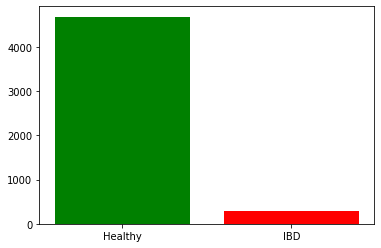

In [17]:
# Representation des effectifs par classe
h = np.bincount(train_label)
plt.bar(['0','1'],h,color=['green','red'],tick_label=['Healthy','IBD'])

In [18]:
from sklearn.preprocessing import StandardScaler
def data_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data

In [19]:
train_data = pd.concat([train_data_clinical,train_data_otu],axis=1)
test_data = pd.concat([test_data_clinical,test_data_otu],axis=1)

In [20]:
train_data.shape, test_data.shape

((4965, 7046), (850, 7046))

In [21]:
train_data_scalar = data_scaler(train_data)
test_data_scalar = data_scaler(test_data)

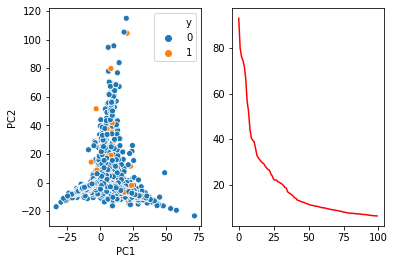

In [22]:
from sklearn.decomposition import PCA
import seaborn as sn
pca = PCA(n_components=100)
pca.fit(train_data)
coord = pca.fit_transform(train_data_scalar)
pca_frame = pd.DataFrame(coord[:,range(2)],columns=['PC1','PC2'])
pca_frame=pd.concat([pca_frame,pd.DataFrame(train_label,columns=['y'])],axis=1)
plt.subplot(121)
sn.scatterplot(x='PC1',y='PC2',hue='y',data=pca_frame)
plt.legend()
plt.subplot(122)
plt.plot(pca.explained_variance_,color="red")

### On définit les données (train,test) pour entrainer et tester nos differents modéles 

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data_scalar,train_label,test_size=0.2,random_state=42)

In [24]:
X_train.shape, X_test.shape, np.size(y_train), np.size(y_test)

((3972, 7046), (993, 7046), 3972, 993)

### Une fonction permettant de choisir un modéle

In [25]:
from sklearn.metrics import accuracy_score
def model_selection(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    vect_pred = model.predict_proba(x_test)[:,1]
    res_model = {'acc_score':acc_score,'vect_pred':vect_pred,'model':model}
    return res_model

### Ici on crée un fonction permettant de tracer la courbe ROC et le score AUC

In [26]:
def courbe_roc_auc(test,vect_prob) :
    fpr_clinical_otu,tpr_clinical_otu,thres_clinical_otu = roc_curve(test, vect_prob)
    auc_clinical_otu = roc_auc_score(test,vect_prob)
    plt.plot(fpr_clinical_otu,tpr_clinical_otu,label="AUC="+str(np.round(auc_clinical_otu,2)))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('Courbe roc')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

### Modéle 1 : Kneighbor KNeighborsClassifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
model_1 = KNeighborsClassifier(n_neighbors=4)
model_1_clinical_otu = model_selection(model_1,X_train,y_train,X_test,y_test)

In [28]:
print("accuracy_score = ",model_1_clinical_otu['acc_score'])

accuracy_score =  0.9526686807653575


Courbe ROC

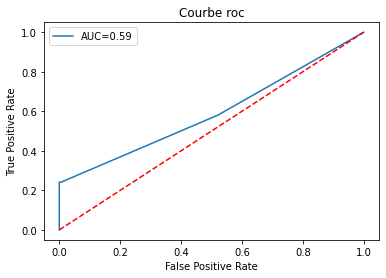

In [29]:
courbe_roc_auc(y_test,model_1_clinical_otu['vect_pred'])

### Modéle 2 : Regression logistique 

In [30]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(penalty="l2",max_iter=1000,random_state=0,solver="lbfgs")
model_2_clinical_otu = model_selection(model_2,X_train,y_train,X_test,y_test)

In [31]:
print("accuracy_score = ",model_2_clinical_otu['acc_score'])

accuracy_score =  0.9496475327291037


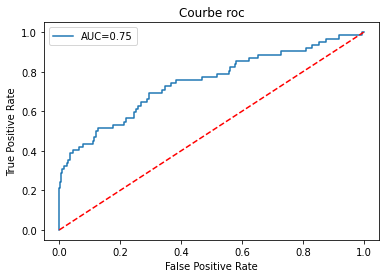

In [32]:
courbe_roc_auc(y_test,model_2_clinical_otu['vect_pred'])

### Méthode de cross-validation


In [33]:
from sklearn.model_selection import cross_val_score
def model_selection_cross_val(model,x_train,y_train):
    score_auc = cross_val_score(model,x_train,y_train,cv=10,scoring='roc_auc')
    return score_auc
log_reg_auc = model_selection_cross_val(model_2,X_train,y_train)

Text(0.5, 1.0, 'Evolution du score par cross-validation')

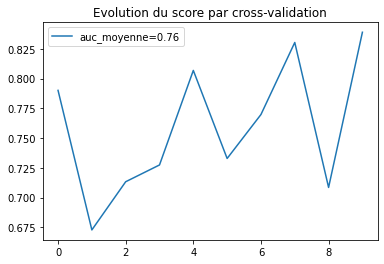

In [62]:
plt.plot(log_reg_auc,label='auc_moyenne='+str(round(log_reg_auc.mean(),2)))
plt.legend()
plt.title('Evolution du score par cross-validation')

Methode 3 : Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=700,criterion="entropy") 
model_3_clinical_otu = model_selection(model_3,X_train,y_train,X_test,y_test)

In [36]:
print("accuracy_score = ",model_3_clinical_otu['acc_score'])

accuracy_score =  0.9526686807653575


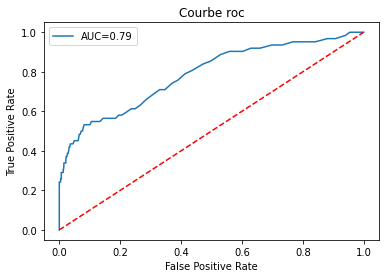

In [37]:
courbe_roc_auc(y_test,model_3_clinical_otu['vect_pred'])

#### Modéle de selection de variable

In [38]:
# Ici on récupere le score de chaque variable 
feature_score = pd.Series(model_3_clinical_otu['model'].feature_importances_).sort_values(ascending=False)
feature_score

1457    0.006661
2916    0.005965
815     0.005475
3124    0.005408
3172    0.005183
          ...   
5318    0.000000
5317    0.000000
5314    0.000000
5311    0.000000
7045    0.000000
Length: 7046, dtype: float64

In [39]:
feature_score_df = pd.Series(model_3_clinical_otu['model'].feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_score_df

OTU_1445    0.006661
OTU_2904    0.005965
OTU_803     0.005475
OTU_3112    0.005408
OTU_3160    0.005183
              ...   
OTU_5306    0.000000
OTU_5305    0.000000
OTU_5302    0.000000
OTU_5299    0.000000
OTU_7033    0.000000
Length: 7046, dtype: float64

In [40]:
ind_to_select = feature_score[feature_score!=0].index
ind_to_select

Int64Index([1457, 2916,  815, 3124, 3172, 2503,    4,   43, 1333, 2222,
            ...
            6017, 5625, 5060, 5456, 5574,  682, 5424, 2868,  249, 5837],
           dtype='int64', length=5754)

In [41]:
X_train_new = X_train[:,ind_to_select]
X_test_new = X_test[:,ind_to_select]

In [42]:
X_train_new.shape, X_test_new.shape

((3972, 5754), (993, 5754))

In [43]:
model_3_new = RandomForestClassifier(n_estimators=700,criterion="entropy") 

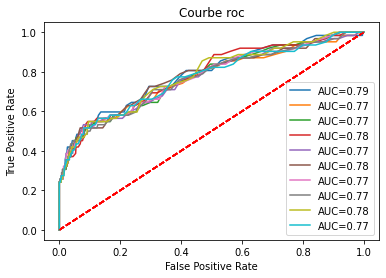

In [44]:
auc_new = np.array([])
for i in range(10):
    model_3_new.fit(X_train_new,y_train)
    fpr_new,tpr_new,thres_new = roc_curve(y_test, model_3_new.predict_proba(X_test_new)[:,1])
    auc_new = np.append(auc_new,roc_auc_score(y_test,model_3_new.predict_proba(X_test_new)[:,1]))
    plt.plot(fpr_new,tpr_new,label="AUC="+str(np.round(auc_new[i],2)))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.legend()
plt.title('Courbe roc')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
# Ici on calcul la moyenne des score AUC obtenus
mean_auc = np.mean(auc_new)
mean_auc

0.7731566820276498

Modéle 4 : SVC

In [46]:
from sklearn.svm import SVC
model_4 = SVC(C=2,probability=True,kernel="linear")
model_4_clinical_otu = model_selection(model_4,X_train,y_train,X_test,y_test)

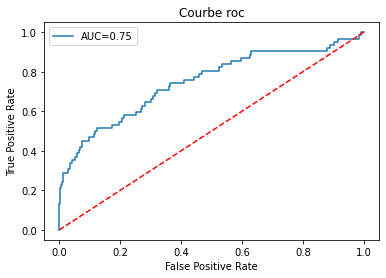

In [47]:
courbe_roc_auc(y_test,model_4_clinical_otu['vect_pred'])

### Matrice de confusion

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def conf_matrix(y_true,x_test,model):
    cm = confusion_matrix(y_true,model.predict(x_test))
    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
    mat_conf = sns.heatmap(cm_matrix,annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Matrice de confusion')
    return mat_conf

<AxesSubplot:title={'center':'Matrice de confusion'}>

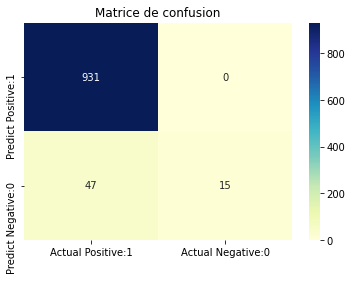

In [49]:
conf_matrix(y_test,X_test,model_1_clinical_otu['model'])

<AxesSubplot:title={'center':'Matrice de confusion'}>

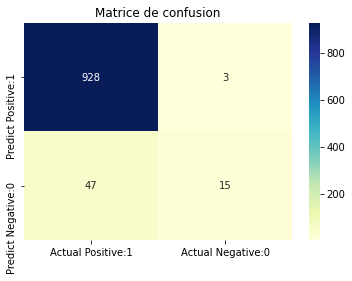

In [50]:
conf_matrix(y_test,X_test,model_2_clinical_otu['model'])

<AxesSubplot:title={'center':'Matrice de confusion'}>

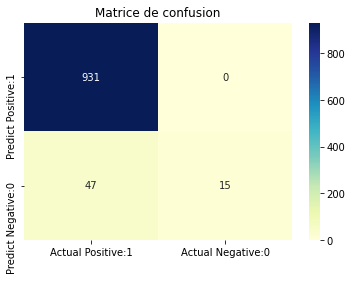

In [51]:
conf_matrix(y_test,X_test,model_3_clinical_otu['model'])

<AxesSubplot:title={'center':'Matrice de confusion'}>

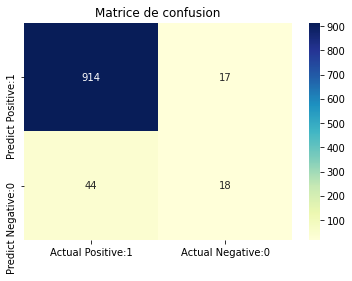

In [52]:
conf_matrix(y_test,X_test,model_4_clinical_otu['model'])

### Ici on définit un modèle de perceptron multi-couches

In [53]:
# specify tensorflow version
tensorflow_version = "V2"

In [54]:
# import packages
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
# import tensorflow requirements - depending on version
if tensorflow_version == "V1":
    from keras import backend as K
    from keras.models import Model
    from keras.models import Sequential
    from keras.models import load_model
    from keras.layers import Dense, Activation, Flatten
    from keras.layers import Conv2D, MaxPooling2D
    from keras.utils import to_categorical
if tensorflow_version == "V2":
    from tensorflow.keras.models import Model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.models import load_model
    from tensorflow.keras.layers import Dense, Activation, Flatten
    from tensorflow.keras.layers import Conv2D, MaxPooling2D
    from tensorflow.keras.utils import to_categorical
# set random seed
np.random.seed(123)

In [55]:
model_neuronal = Sequential()
n_units = 1
input_dim = X_train.shape[1]
model_neuronal.add(Dense(n_units,input_dim=input_dim,activation="relu"))
model_neuronal.add(Dense(1,activation="sigmoid"))

In [56]:
model_neuronal.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 7047      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 7,049
Trainable params: 7,049
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_neuronal.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC']) 

In [58]:
model_neuronal_fit = model_neuronal.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
125/125 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.9449 - auc: 0.6398
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9449 - auc: 0.7815
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1960 - accuracy: 0.9449 - auc: 0.8583
Epoch 4/10
125/125 [==============================] - 0s 1ms/step - loss: 0.1696 - accuracy: 0.9449 - auc: 0.8845
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9449 - auc: 0.8923
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9449 - auc: 0.8971
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1412 - accuracy: 0.9449 - auc: 0.9011
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1372 - accuracy: 0.9449 - auc: 0.9084
Epoch 9/10
125/125 [==============================] - 0s 3ms/step - loss: 0.1360 - accur

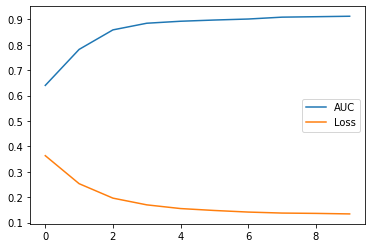

In [59]:
plt.plot(model_neuronal_fit.history['auc'],label="AUC")
plt.plot(model_neuronal_fit.history['loss'],label="Loss")
plt.legend()

### Sauvegarde de données de prédiction

In [60]:
pred_model_rl = model_2_clinical_otu['model'].predict_proba(X_test)
pd.DataFrame(pred_model_rl,columns=['HEALTHY','IBD']).to_csv('prediction_reg_log',sep=";",index=False)

In [61]:
pred_model_rl

array([[9.99524872e-01, 4.75127723e-04],
       [9.91358134e-01, 8.64186608e-03],
       [9.99982719e-01, 1.72814174e-05],
       ...,
       [9.99997319e-01, 2.68134838e-06],
       [9.96940638e-01, 3.05936157e-03],
       [9.99239310e-01, 7.60689841e-04]])